#### Import and explore the data


In [71]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set(style="whitegrid")


import warnings 
warnings.filterwarnings('ignore')

##### Reading Data

In [72]:
#path = "/content/drive/MyDrive/Colab Notebooks/Greatelearning/"
path = "/Data/"
data = pd.read_csv(path+"signal-data.csv")
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

##### Exploratory Data Analysis



###### shape of the data

In [73]:
data.shape

(1567, 592)

Observation
- there are 592 features and 1500+ observations

###### rename column name

In [74]:
data_analysis = data.copy()
data_analysis = data_analysis.add_prefix("dimension_")
data_analysis.rename(columns={"dimension_Pass/Fail": "Target"},inplace = True)
data_analysis.columns

Index(['dimension_Time', 'dimension_0', 'dimension_1', 'dimension_2',
       'dimension_3', 'dimension_4', 'dimension_5', 'dimension_6',
       'dimension_7', 'dimension_8',
       ...
       'dimension_581', 'dimension_582', 'dimension_583', 'dimension_584',
       'dimension_585', 'dimension_586', 'dimension_587', 'dimension_588',
       'dimension_589', 'Target'],
      dtype='object', length=592)

###### Treating Target column

In [75]:
print(data_analysis["Target"].isna().sum()) # No missing value in target 
print(data_analysis["Target"].value_counts())

# Update Fail (1) = 0 and Pass (-1) = 1 for the better understanding
data_analysis["Target"] = np.where(data_analysis["Target"] == -1,1,0 )
print(data_analysis["Target"].value_counts())

print(round(data_analysis['Target'].value_counts() / data_analysis['Target'].count(),2)*100)

0
-1    1463
 1     104
Name: Target, dtype: int64
1    1463
0     104
Name: Target, dtype: int64
1    93.0
0     7.0
Name: Target, dtype: float64


 - Observation 
  - To avoid cognitive load , target value -1 is converted to 1 ( which represent pass) and 1 is converted to 0 ( which is fail)
  - 93% of observation represent the pass and 7 % represent fail

###### Missing data & Impute with Zero 

In [88]:
print("# of data Features has missing Value",data_analysis.isna().sum()[data_analysis.isna().sum() >=1].count())

# of data Features has missing Value 422


- description

###### removing irrelavent columns

In [77]:
data_analysis.columns

Index(['dimension_Time', 'dimension_0', 'dimension_1', 'dimension_2',
       'dimension_3', 'dimension_4', 'dimension_5', 'dimension_6',
       'dimension_7', 'dimension_8',
       ...
       'dimension_581', 'dimension_582', 'dimension_583', 'dimension_584',
       'dimension_585', 'dimension_586', 'dimension_587', 'dimension_588',
       'dimension_589', 'Target'],
      dtype='object', length=592)

In [78]:
data_analysis.drop(columns=["dimension_Time"],inplace=True) # removing Time attribute

In [79]:
# removing feature with same value for entire observation
data_stat = pd.DataFrame(data = data_analysis.describe(include="all").T.reset_index())
feature_name_with_same_value = list(data_stat[data_stat["min"] == data_stat["max"]]["index"])
#print(data_stat[data_stat["index"].isin(feature_name_with_same_value)])
data_analysis.drop(columns=feature_name_with_same_value,inplace=True)


In [80]:
# # Check for feature which has more than 75% of missing value
# missing_data = pd.DataFrame(data_analysis.isna().sum().reset_index(),columns=["Feature_name","Missing_count"])
# missing_data["per_missing"] = (missing_data["Missing_count"] / data_analysis.shape[0])

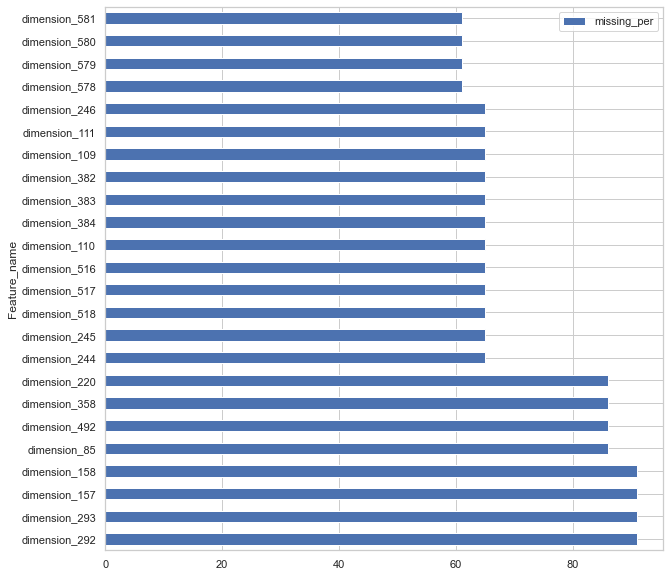

In [81]:
missing_data = pd.DataFrame(data_analysis.isna().sum().reset_index())
missing_data.rename(columns={"index": "Feature_name", 0: "missing_count"},inplace=True) 
missing_data["missing_per"] = round((missing_data["missing_count"] / data_analysis.shape[0]) * 100)
missing_data = missing_data[missing_data.missing_per >=60].sort_values(by="missing_per",ascending=False)
missing_data.plot.barh(x="Feature_name",y="missing_per",figsize=(10,10))


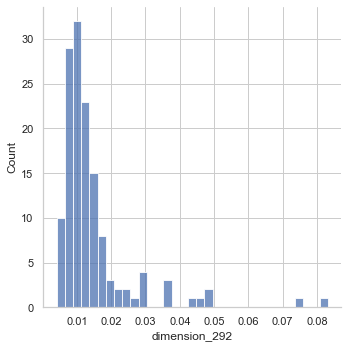

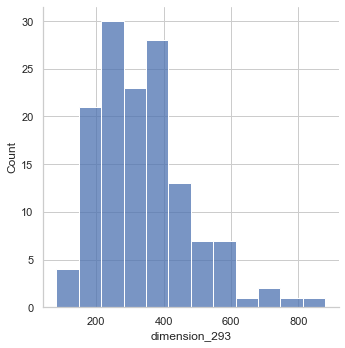

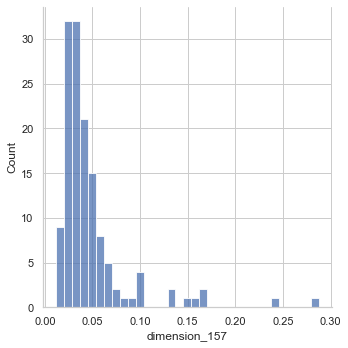

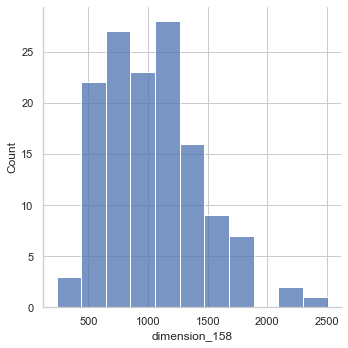

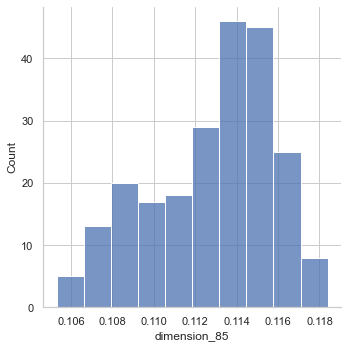

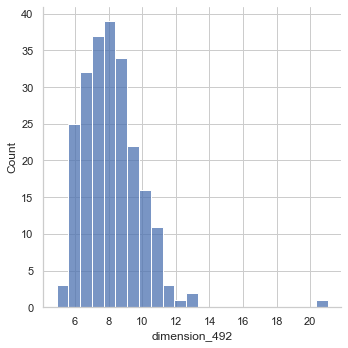

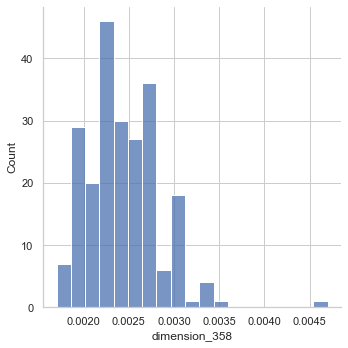

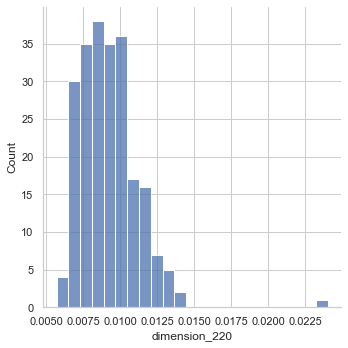

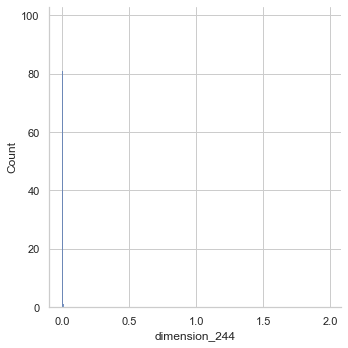

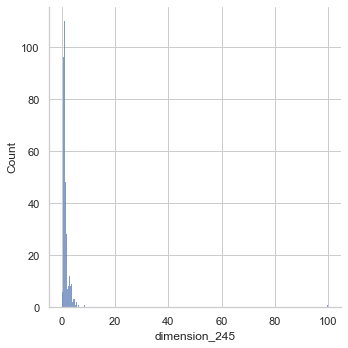

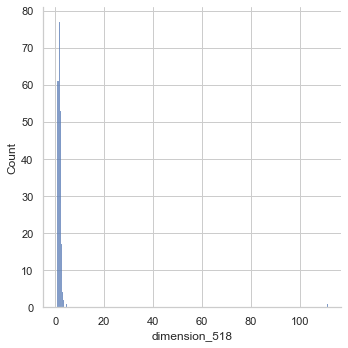

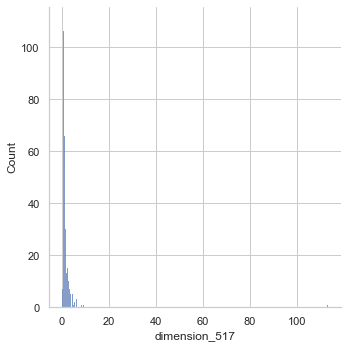

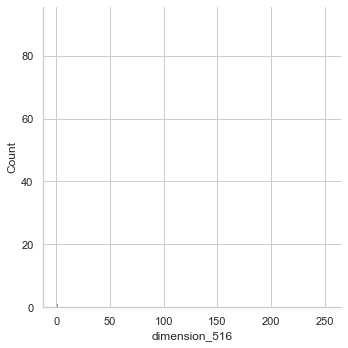

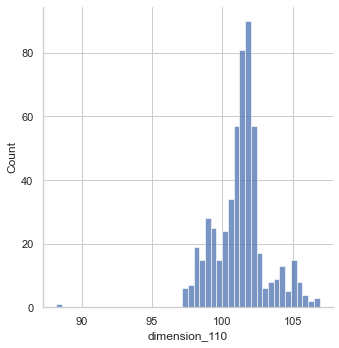

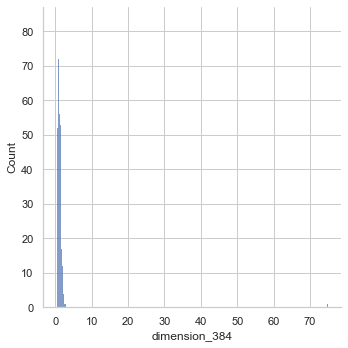

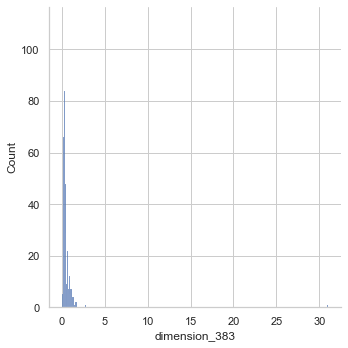

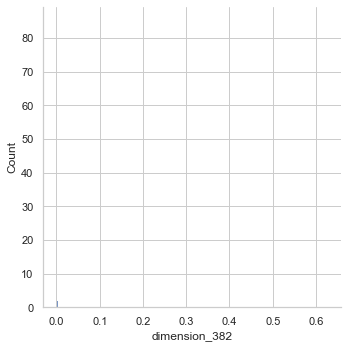

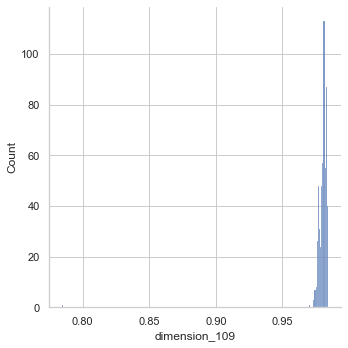

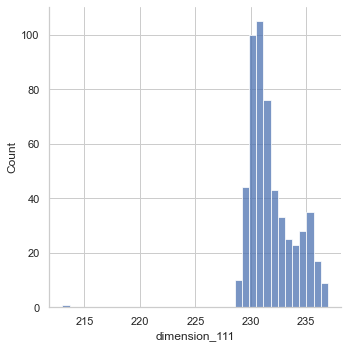

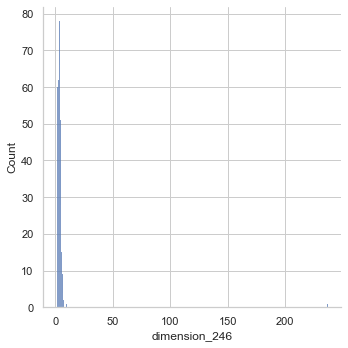

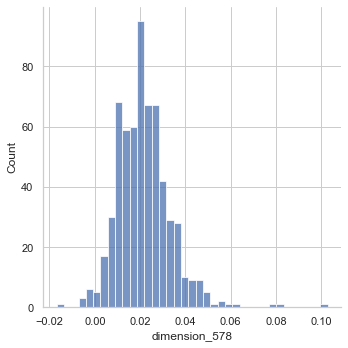

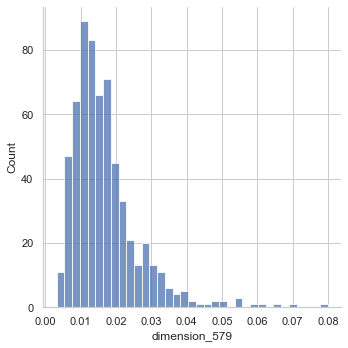

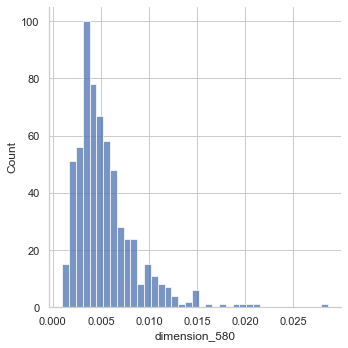

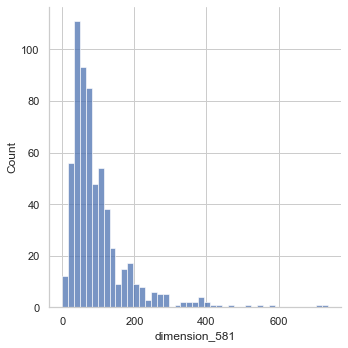

In [87]:
for colname in missing_data["Feature_name"].unique():
  sns.displot(data=data_analysis,x=colname)
  plt.show()

#### Validation Set preparation

In [ ]:
def check_distribution(traindata,testdata,columns_list):
    for column_name in columns_list:
        print("---------------",column_name,"------------")
        print(round(traindata[column_name].value_counts() / traindata[column_name].count(),2)*100)
        print(round(testdata[column_name].value_counts() / testdata[column_name].count(),2)*100)

In [ ]:
X_train_test_validate = data_impute.iloc[:,:-1]
y_train_test_validate = data_impute.iloc[:,-1:]

X_train_test, X_validate,y_train_test,y_validate = train_test_split(X_train_test_validate, y_train_test_validate, test_size=0.15, random_state=123)
check_distribution(y_train_test,y_validate,['Target'])
